Dithering Techniques using PIL and OPENCV

# PIL Introduction

https://pillow.readthedocs.io/en/stable/

## Importing Libraries

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
from google.colab import files
files.upload()

We can create the image, load the image, and save the image by different methods.

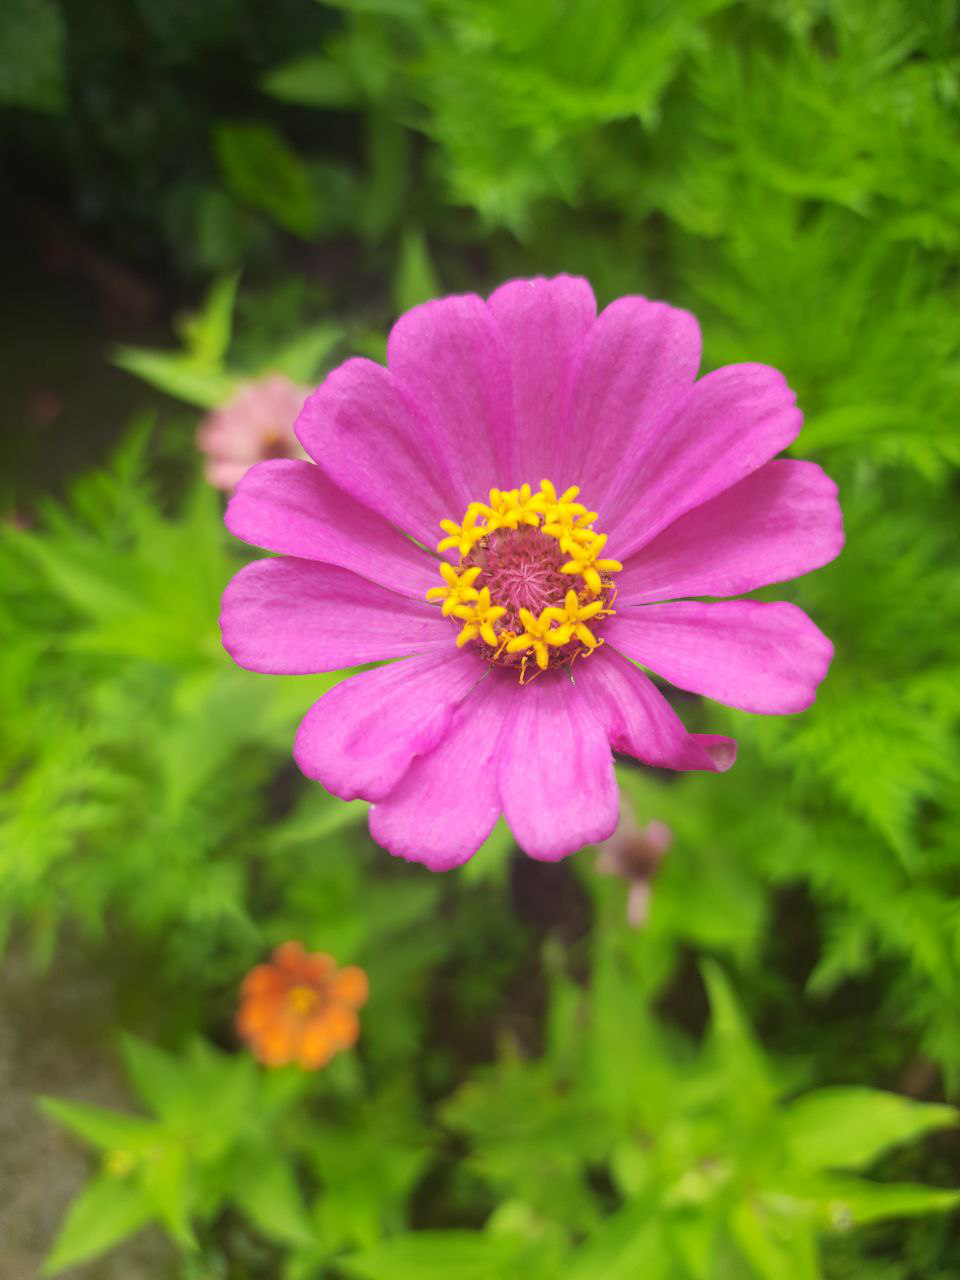

In [ ]:
image_name = 'flower.jpg'
image = Image.open(image_name)
image.show()

# with Image.open('flower.jpg') as image:
#   image.show()

# To create an image:
# img = Image.new('RGBA', (w,h)) -> RGB color channels, A transparency

In [ ]:
print(image.format, image.size, image.mode, image.filename, image.format_description)

JPEG (960, 1280) RGB flower.jpg JPEG (ISO 10918)


We can convert the image to grayscale by getting rid of hue and saturation and keeping only brightness, next way is to average the value of rgb, i.e. r= g= b= 59.

In [ ]:
arr = np.array(image)
print(arr.shape)
print(arr)

(1280, 960, 3)
[[[ 39  65  26]
  [ 36  62  23]
  [ 35  61  22]
  ...
  [ 47  84  15]
  [ 46  83  16]
  [ 47  84  17]]

 [[ 39  65  26]
  [ 36  62  23]
  [ 35  61  22]
  ...
  [ 48  85  16]
  [ 46  83  16]
  [ 47  84  17]]

 [[ 39  65  26]
  [ 36  62  23]
  [ 35  61  22]
  ...
  [ 49  86  17]
  [ 47  84  17]
  [ 46  83  16]]

 ...

 [[126 111  78]
  [126 111  78]
  [126 111  78]
  ...
  [ 50  70  17]
  [ 48  68  15]
  [ 46  66  13]]

 [[128 113  80]
  [127 112  79]
  [126 111  78]
  ...
  [ 51  71  18]
  [ 49  69  16]
  [ 47  67  14]]

 [[130 115  82]
  [128 113  80]
  [127 112  79]
  ...
  [ 52  72  19]
  [ 50  70  17]
  [ 48  68  15]]]


## Color Enhancements

### GrayScale

#### 1 Bit GrayScale

(1280, 960) 
 ('1',) 
 [[False False False ... False False False]
 [False False  True ...  True False  True]
 [False False False ... False False False]
 ...
 [False  True False ... False False False]
 [ True False  True ... False  True False]
 [False  True False ...  True False False]]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 0 1 0]
 [0 1 0 ... 1 0 0]]


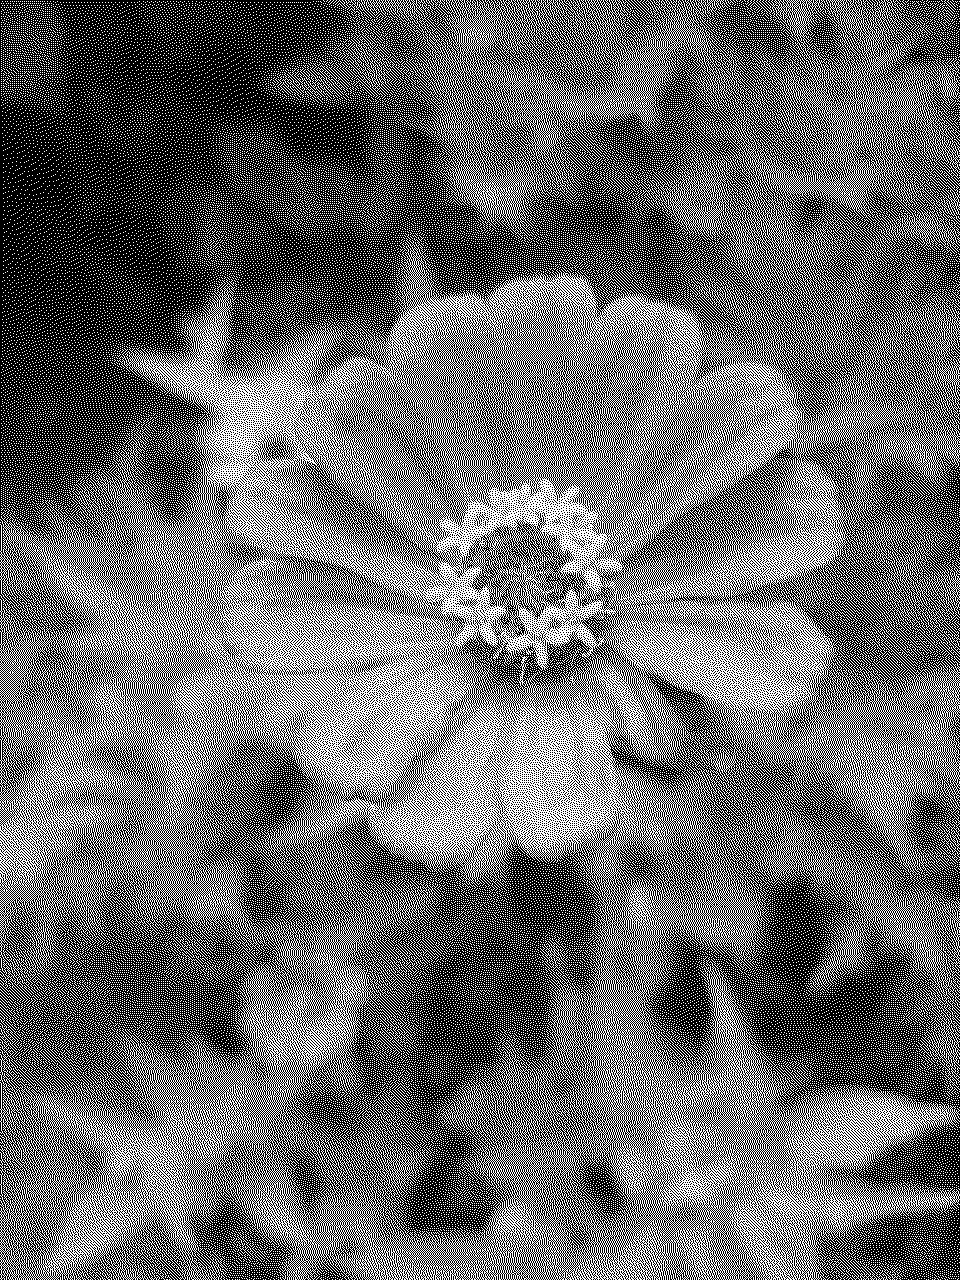

In [ ]:
img_grayscale_1bit = image.convert('1')
arr_1bit = np.array(img_grayscale_1bit)
print(arr_1bit.shape,"\n", img_grayscale_1bit.getbands(),"\n", arr_1bit)
print(np.array(img_grayscale_1bit, dtype = int))
img_grayscale_1bit.show()

#### 8 Bit GrayScale (L)

(1280, 960) 
 ('L',) 
 [[ 53  50  49 ...  65  64  65]
 [ 53  50  49 ...  66  64  65]
 [ 53  50  49 ...  67  65  64]
 ...
 [112 112 112 ...  58  56  54]
 [114 113 112 ...  59  57  55]
 [116 114 113 ...  60  58  56]]
[[ 53  50  49 ...  65  64  65]
 [ 53  50  49 ...  66  64  65]
 [ 53  50  49 ...  67  65  64]
 ...
 [112 112 112 ...  58  56  54]
 [114 113 112 ...  59  57  55]
 [116 114 113 ...  60  58  56]]


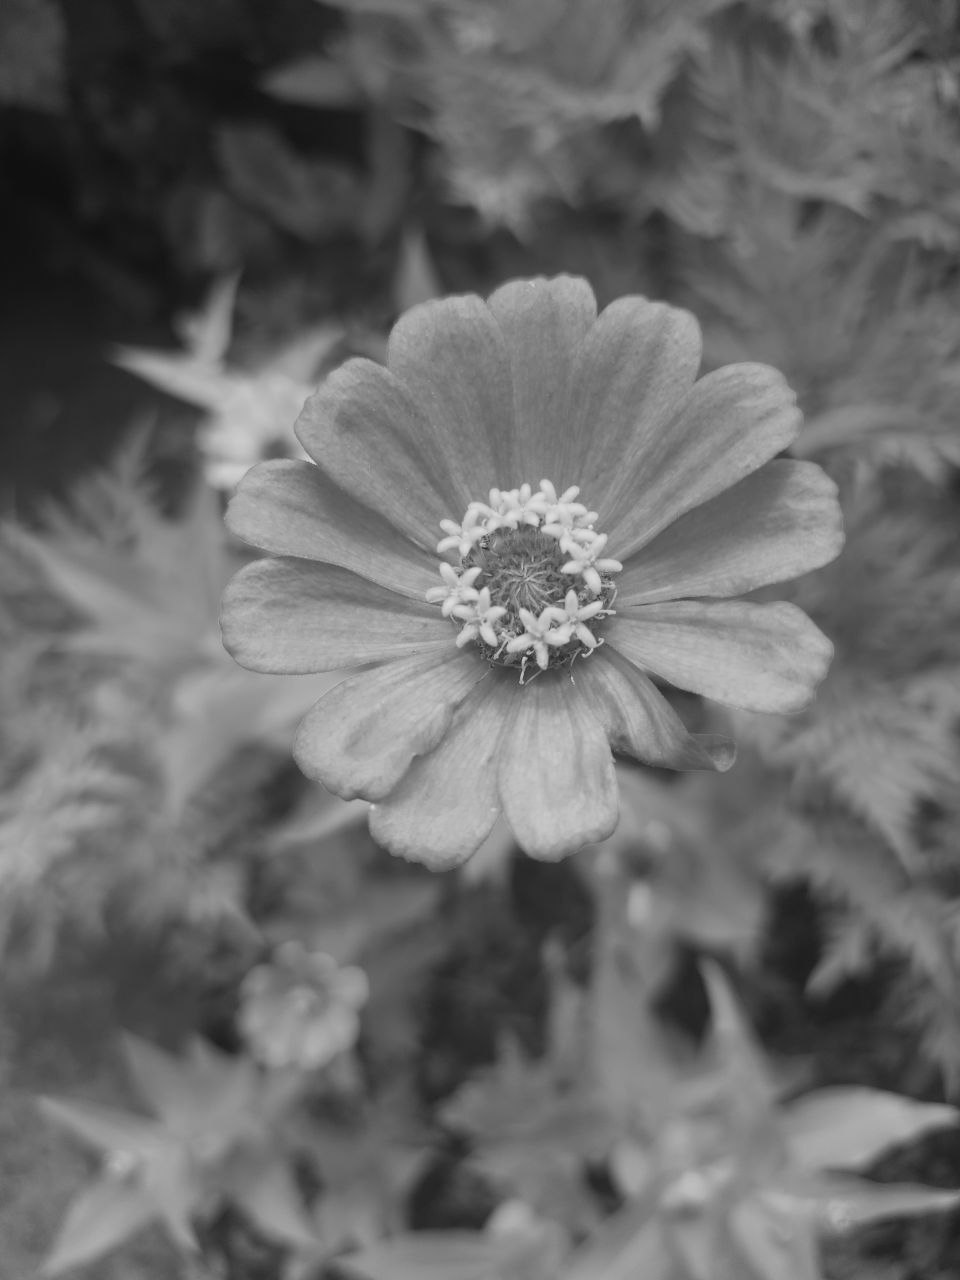

In [ ]:
img_grayscale_L = image.convert('L')
arr_L = np.array(img_grayscale_L)
print(arr_L.shape,"\n", img_grayscale_L.getbands(),"\n", arr_L)
print(np.array(img_grayscale_L, dtype = int))
img_grayscale_L.show()

### Palette

There is other colorful way known as palette where Image.convert('P')

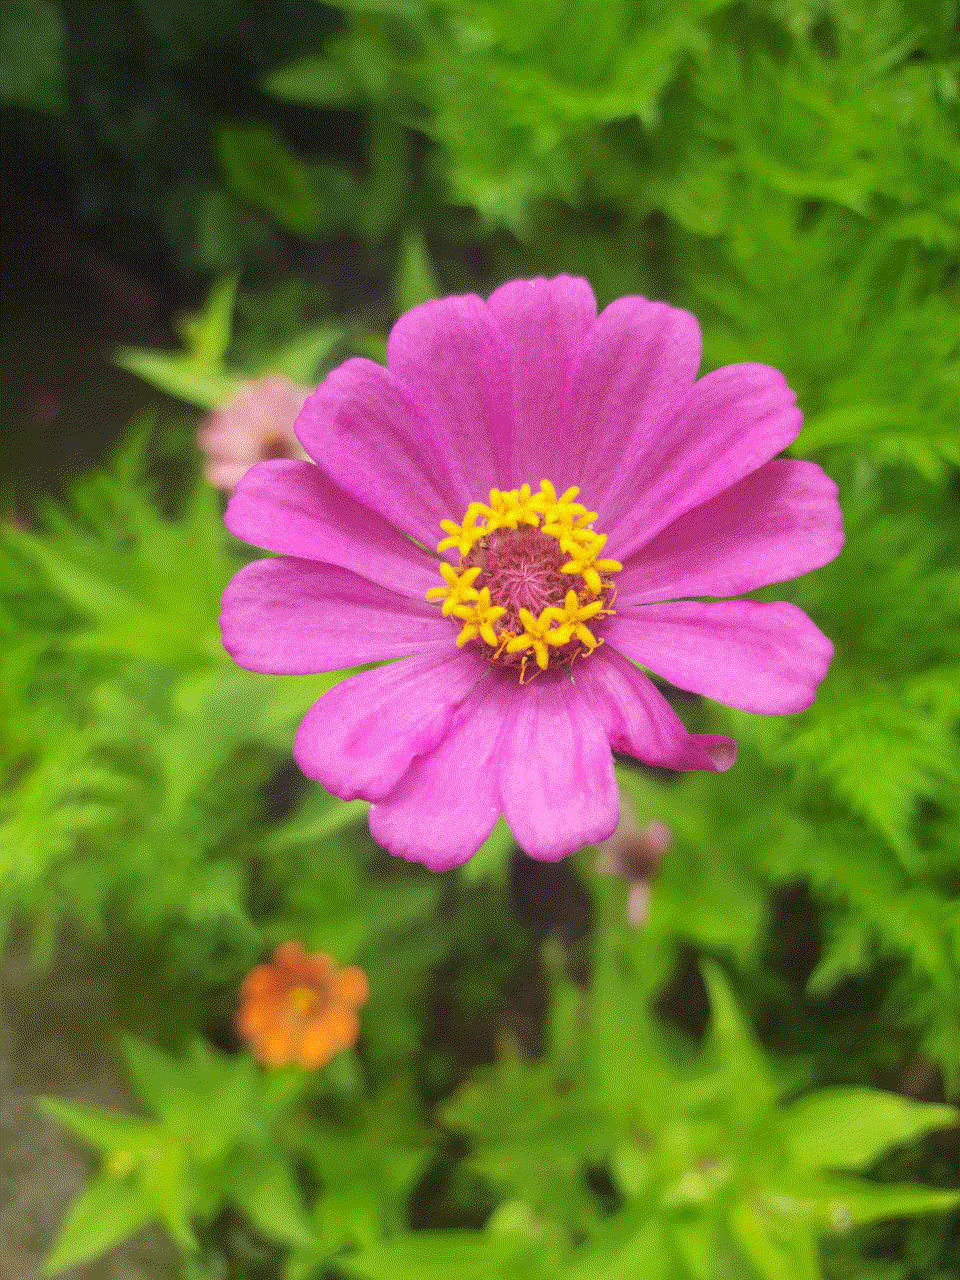

In [ ]:
img_palette = image.convert('P')
img_palette.show()

# PIL Dithering

## Only Black and White

1 Bit GrayScale without dither

In [ ]:
image_file = image.convert('1', dither=Image.NONE)
image_file.show()

8 Bit GrayScale

In [ ]:
gray = image.convert('L')

PIL

In [ ]:
bwpil = gray.point(lambda x: 0 if x<128 else 255, '1')
bwpil.show()

NumPy and PIL

(1280, 960) [[ 53  50  49 ...  65  64  65]
 [ 53  50  49 ...  66  64  65]
 [ 53  50  49 ...  67  65  64]
 ...
 [112 112 112 ...  58  56  54]
 [114 113 112 ...  59  57  55]
 [116 114 113 ...  60  58  56]]


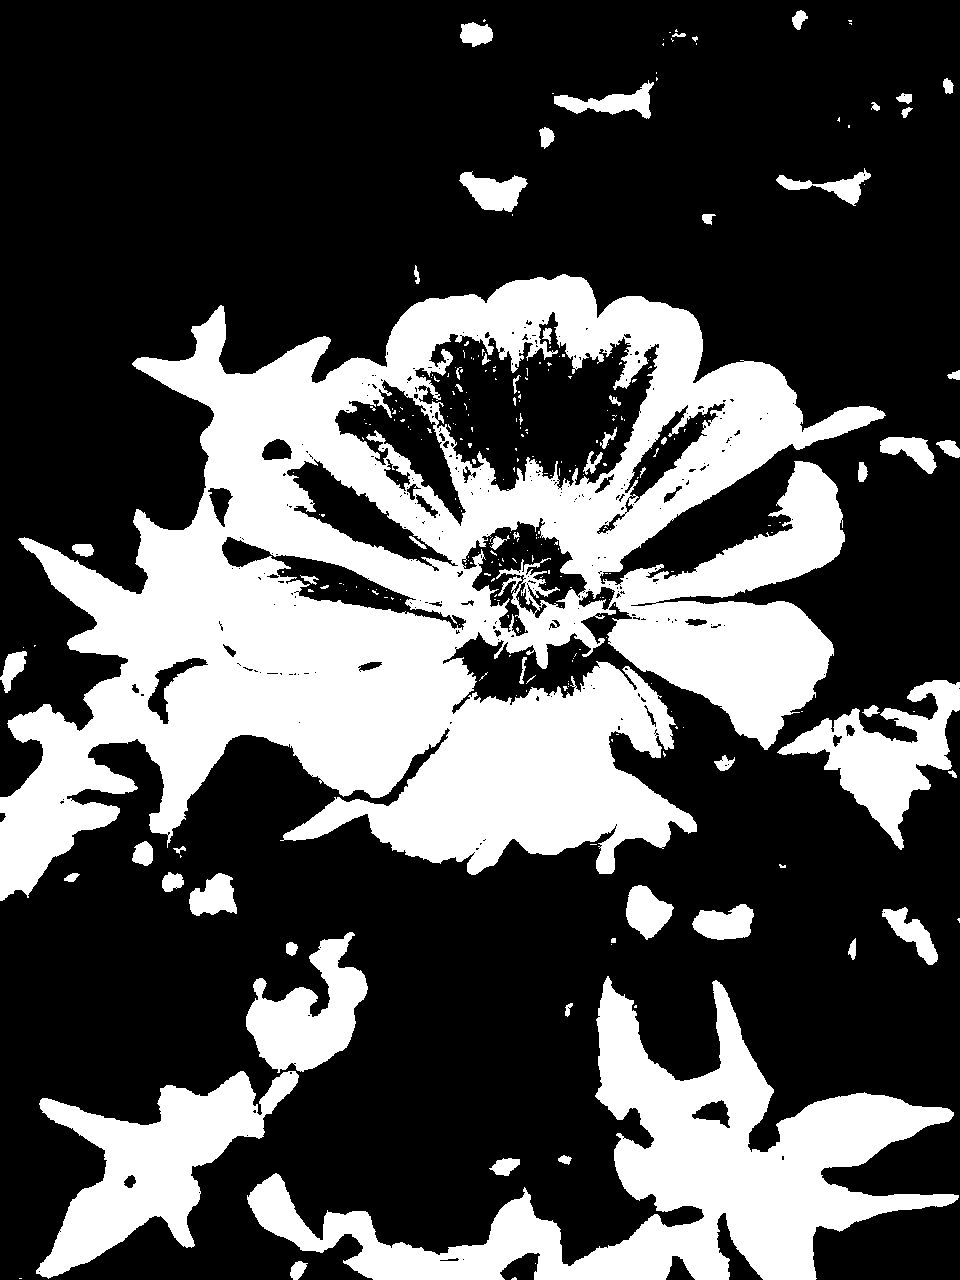

In [ ]:
bwnp = np.asarray(gray).copy()
print(bwnp.shape, bwnp)
bwnp[bwnp < 128] = 0
bwnp[bwnp >= 128] = 255
bw = Image.fromarray(bwnp)
bw.show()

## Floyd-Steinberg Dithering

In [ ]:
gray = image.convert('L')
grayarray = np.asarray(gray).copy()
print(grayarray)
grayarray = grayarray[:,:,np.newaxis]
print(grayarray)
print(grayarray.shape)

[[ 53  50  49 ...  65  64  65]
 [ 53  50  49 ...  66  64  65]
 [ 53  50  49 ...  67  65  64]
 ...
 [112 112 112 ...  58  56  54]
 [114 113 112 ...  59  57  55]
 [116 114 113 ...  60  58  56]]
[[[ 53]
  [ 50]
  [ 49]
  ...
  [ 65]
  [ 64]
  [ 65]]

 [[ 53]
  [ 50]
  [ 49]
  ...
  [ 66]
  [ 64]
  [ 65]]

 [[ 53]
  [ 50]
  [ 49]
  ...
  [ 67]
  [ 65]
  [ 64]]

 ...

 [[112]
  [112]
  [112]
  ...
  [ 58]
  [ 56]
  [ 54]]

 [[114]
  [113]
  [112]
  ...
  [ 59]
  [ 57]
  [ 55]]

 [[116]
  [114]
  [113]
  ...
  [ 60]
  [ 58]
  [ 56]]]
(1280, 960, 1)


In [ ]:
def floyd_steinberg(image):
  lx, ly, cc = image.shape
  for j in range(ly):
    for i in range(lx):
      for k in range(cc):
        rounded = round(image[i, j, k])
        err = image[i, j, k] - rounded
        image[i, j, k] = rounded
        if i<lx-1: image[i+1, j, k] += (7/16)*err
        if j<ly-1:
          image[i, j+1, k] += (5/16)*err
          if i>0: image[i-1, j+1, k] += (1/16)*err
          if i<lx-1: image[i+1, j+1, k] += (3/16)*err
  return image

(1280, 960, 1)
(1280, 960)


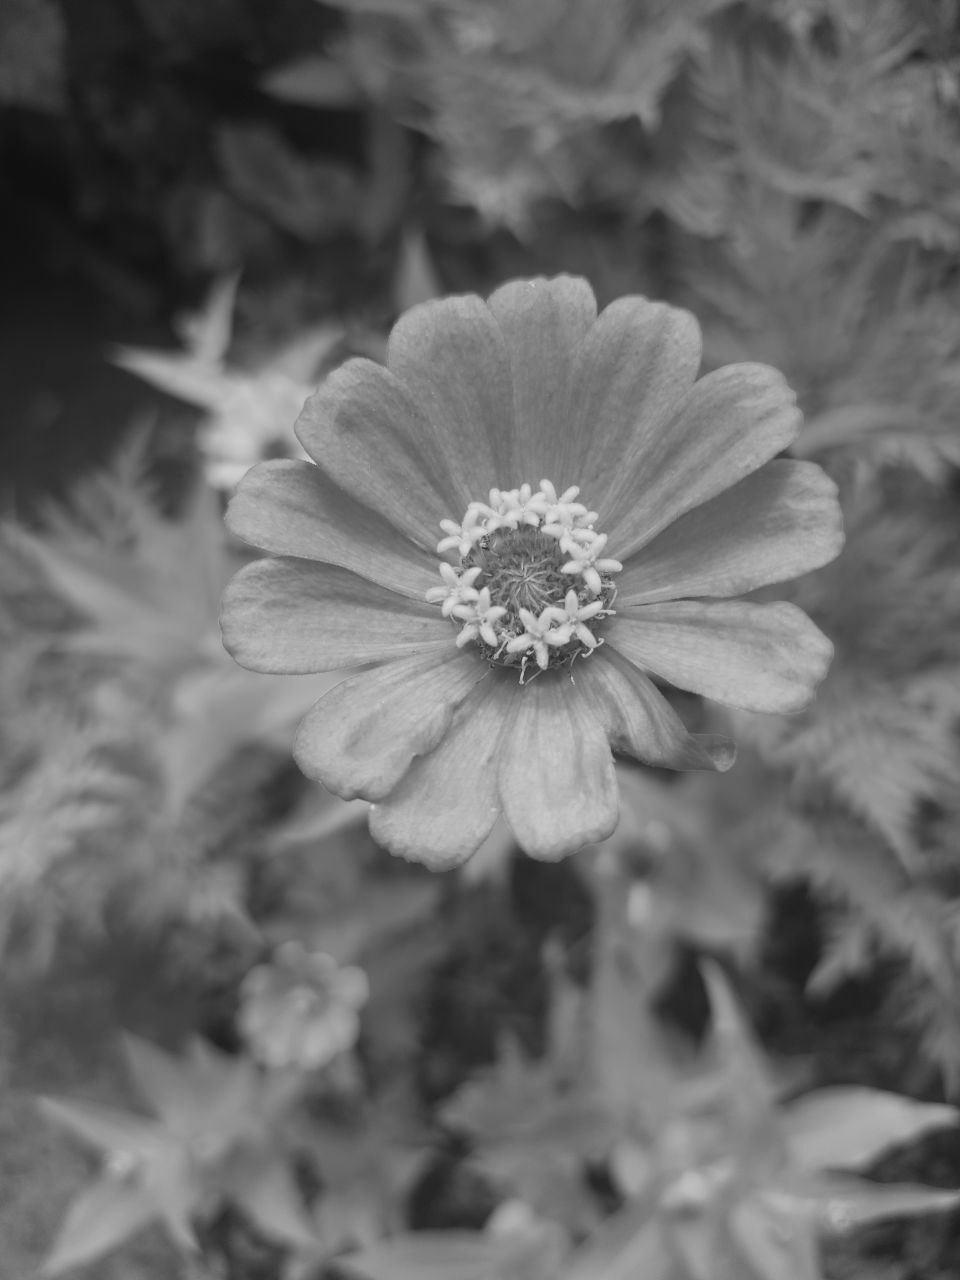

In [ ]:
dit = floyd_steinberg(grayarray)
print(dit.shape)
dit = np.squeeze(dit,axis = 2)
print(dit.shape)
dit = Image.fromarray(dit)
dit.show()

# OpenCV Introduction

## Importing Libraries

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/flower.jpg', 0) # 0 for grayscale, 1 for color image

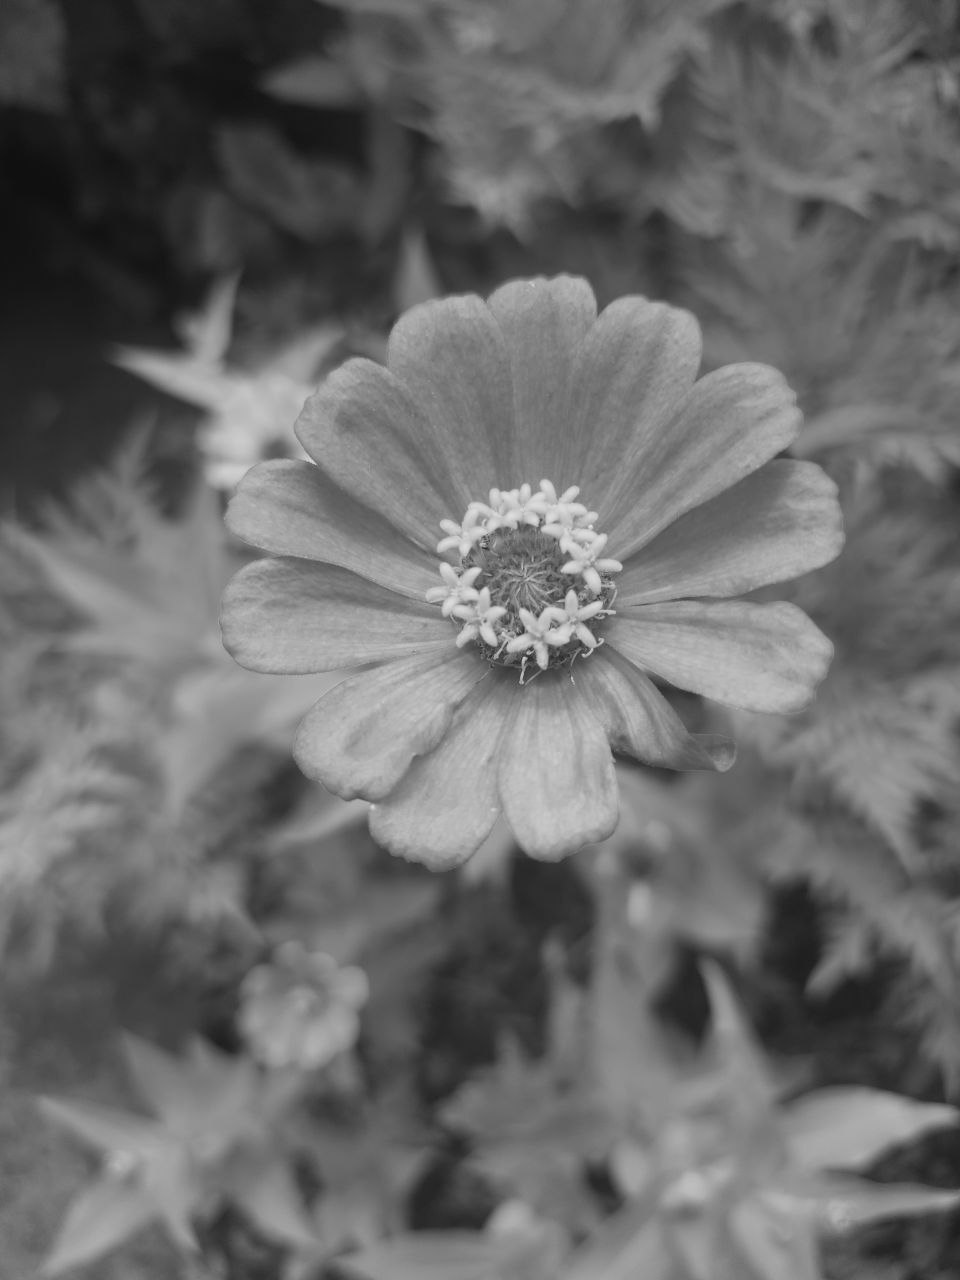

In [ ]:
cv2_imshow(img)

In [ ]:
def set_pixel(im,x,y,new):
    im[x,y]=new

def quantize(im):
    for y in range(0,height-1):
        for x in range(1,width-1):
            old_pixel=im[x,y]
            if old_pixel<127:
                new_pixel=0
            else:
                new_pixel=255
            set_pixel(im,x,y,new_pixel)
            quant_err=old_pixel-new_pixel
            set_pixel(im,x+1,y,im[x+1,y]+quant_err*w1)
            set_pixel(im,x-1,y+1, im[x-1,y+1] +  quant_err*w2 )
            set_pixel(im,x,y+1, im[x,y+1] +  quant_err * w3 )
            set_pixel(im,x+1,y+1, im[x+1,y+1] +  quant_err * w4 )


    return im


In [ ]:
img=cv2.imread("/content/flower.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2=img.copy()
width,height,z=img.shape
w1=7/16.0
#print w1
w2=3/16.0
w3=5/16.0
w4=1/16.0
blue=img[:,:,0]
blue=quantize(blue)
green=img[:,:,1]
green=quantize(green)
red=img[:,:,2]
red=quantize(red)
gray1= quantize(gray)


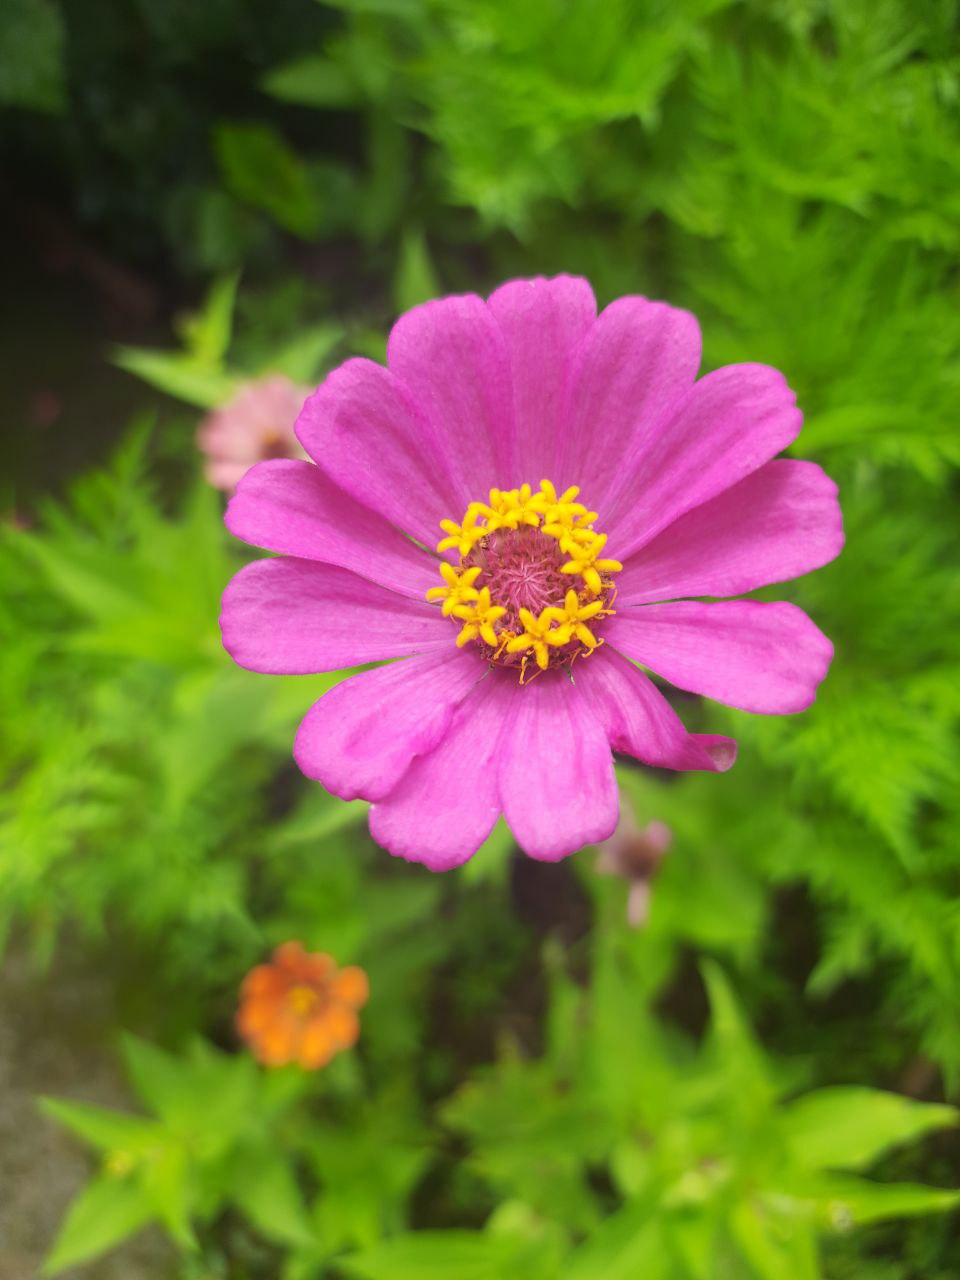

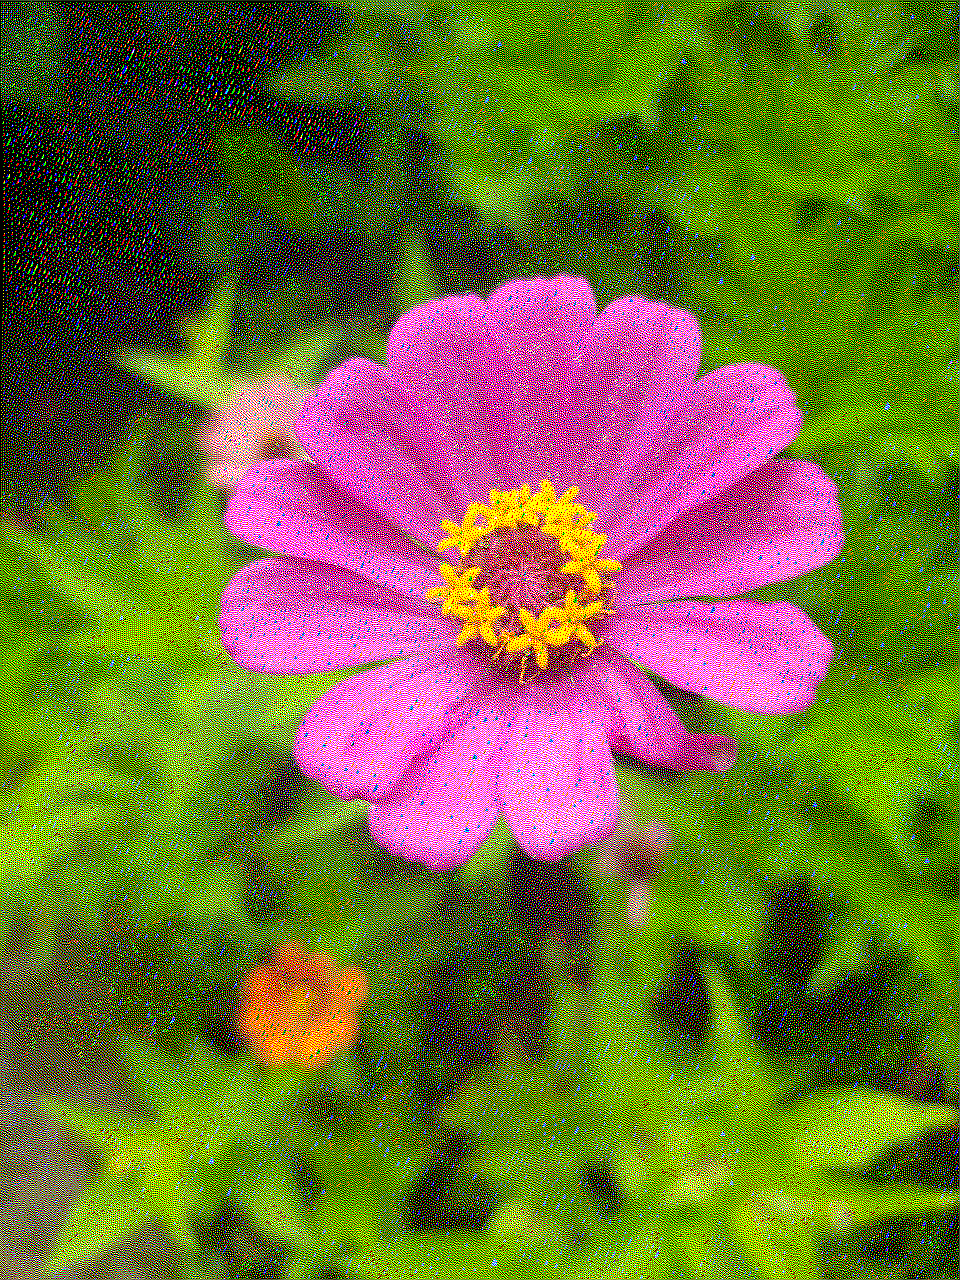

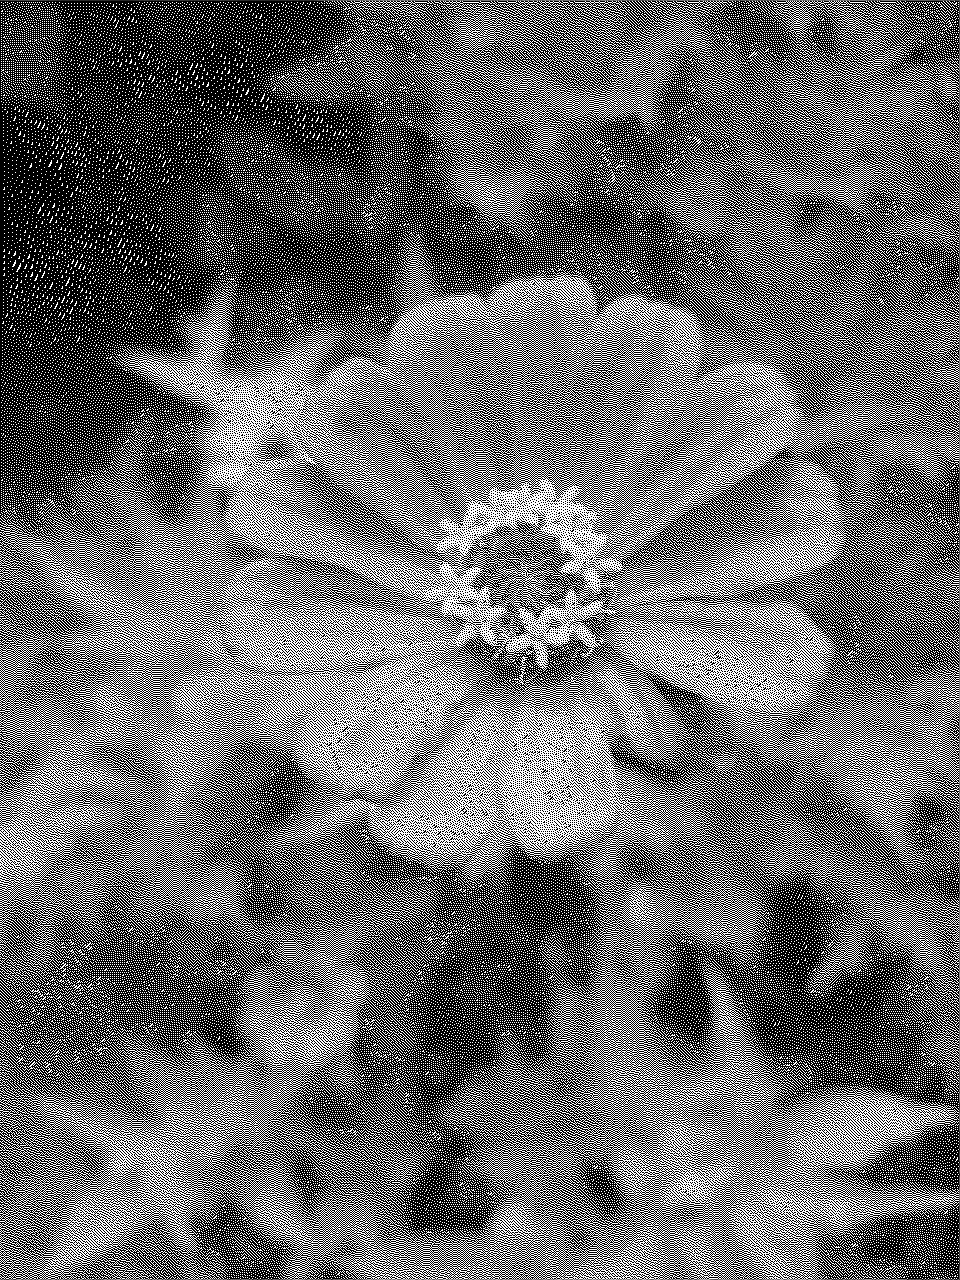

-1

In [ ]:
image = cv2.merge((blue, green, red))
cv2_imshow(img2)
cv2_imshow(image)
cv2_imshow(gray1)
cv2.waitKey(0)